Notebook author: Elena Gronskaya

This notebook gets image similarity metrics between HR images (sentinel) and LR images (landsat and model predictions. It uses the sewar library: https://github.com/andrewekhalel/sewar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install sewar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
import cv2

In [ ]:
'''
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
Peak Signal-to-Noise Ratio (PSNR)
Structural Similarity Index (SSIM)
Universal Quality Image Index (UQI)
Multi-scale Structural Similarity Index (MS-SSIM)
Spatial Correlation Coefficient (SCC)
Relative Average Spectral Error (RASE)
Spectral Angle Mapper (SAM)
Visual Information Fidelity (VIF)
(from https://towardsdatascience.com/measuring-similarity-in-two-images-using-python-b72233eb53c6)
'''

from sewar.full_ref import mse, rmse, psnr, uqi, ssim, scc, rase, sam, msssim, vifp


In [ ]:
# Get  directories: 
# - path to save calculated metrics
# - path to sentinel (high-resolution) images
# - list of paths to landsat (baseline) or model predictions, paired with
# dataset names: [[name, path],[name, path],[name, path]]
# make sure to call landsat (low-resolution) dataset "baseline"
 
metrics_dir = "PATH WHERE METRICS DATA IS TO BE SAVED"

HR_directory = "PATH TO HIGH RESOLUTION IMAGES"

LR_directories = [["DATASET/MODEL NAME","PATH TO LOW RESOLUTION DIRECTORY 1"],
                  ["DATASET/MODEL NAME","PATH TO LOW RESOLUTION DIRECTORY 2"],
                  ["ETC.."]] 

# Loop through, calculating the metrics, and putting in a dataframe

for [model_name, LR_directories] in LR_directories:
  
  metrics_df = []

  LR_files = sorted([f for f in os.listdir(LR_directories) if ('.png' in f or '.tif' in f)])
  HR_files = sorted(os.listdir(HR_directory))

  assert LR_files==HR_files

  for idx, filename in enumerate(LR_files):

    lr_img = imageio.imread(LR_directories+filename)
    hr_img = imageio.imread(HR_directory+filename)

    if model_name=='baseline':
      dims = (265*3, 265*3)
      lr_img = cv2.resize(lr_img.astype('float32'), dims, interpolation= cv2.INTER_CUBIC)

    try:
      metrics_df.append({'MSE' : mse(lr_img, hr_img),
      'RMSE' : rmse(lr_img, hr_img),
      'PSNR' : psnr(lr_img, hr_img),
      'UQI' : uqi(lr_img, hr_img),
      'SCC' : scc(lr_img, hr_img),
      'RASE' : rase(lr_img, hr_img),
      'SAM' : sam(lr_img, hr_img),
      'VIF' : vifp(lr_img, hr_img)})
    except Exception as e:
      print(e)
      pass
  metrics_df = pd.DataFrame(metrics_df)
  print('df created for '+model_name)
  #csv name same as model run time (if not one value per set of weights, add a further extension)
  metrics_df.to_csv(os.path.join(metrics_dir,(model_name+".csv"))) 

In [ ]:
# iterate through list of dataframes, get mean values, create metrics meta_table

metrics_files = [f for f in os.listdir(metrics_dir) if '.csv' in f]

joint_metrics_df = pd.read_csv(metrics_dir+metrics_files[0],index_col=0).median()

for f in metrics_files[1:]:
  c_df = pd.read_csv(metrics_dir+f,index_col=0).median()
  joint_metrics_df = pd.concat([joint_metrics_df, c_df], axis = 1)

joint_metrics_df.columns = [f[:-4] for f in metrics_files]
joint_metrics_df.T

,MSE,RMSE,PSNR,UQI,SCC,RASE,SAM,VIF
baseline,122.451147,11.065765,358.418166,0.948040,0.061442,1534.753687,0.207505,0.231683
rdn_small_2022-04-21_1652_200ep,107.488232,10.367653,27.817194,0.963907,0.040191,1357.074155,0.200299,0.257681
rdn_small_2022-04-21_1730_150ep,107.696719,10.377703,27.808779,0.963700,0.039904,1356.209210,0.200499,0.253916
rdn_small_2022-04-21_1818_100ep,108.159217,10.399962,27.790168,0.963095,0.041836,1361.005989,0.198871,0.239640
rdn_small_2022-04-21_2123_full_train_150ep,111.903708,10.578455,27.642359,0.963262,0.024770,1377.333517,0.201257,0.264249
rdn_large_2022-04-21_1842_200ep,108.457991,10.414317,27.778188,0.964937,0.032132,1341.398062,0.199312,0.251567
rdn_large_2022-04-21_1959_150ep,107.819458,10.383615,27.803832,0.964473,0.033535,1362.855663,0.200083,0.242255
rdn_large_2022-04-21_2028_100ep,107.601545,10.373116,27.812619,0.964920,0.028495,1341.913034,0.200069,0.254458
rdn_large_2022-04-21_2044_full_train_150ep,109.372696,10.458140,27.741714,0.963155,0.019418,1344.253105,0.199659,0.241199
rrdn-C4-D3-G64-G064-T10-x3,134.364445,11.591568,26.847960,0.945945,0.018674,1581.684123,0.226665,0.151396


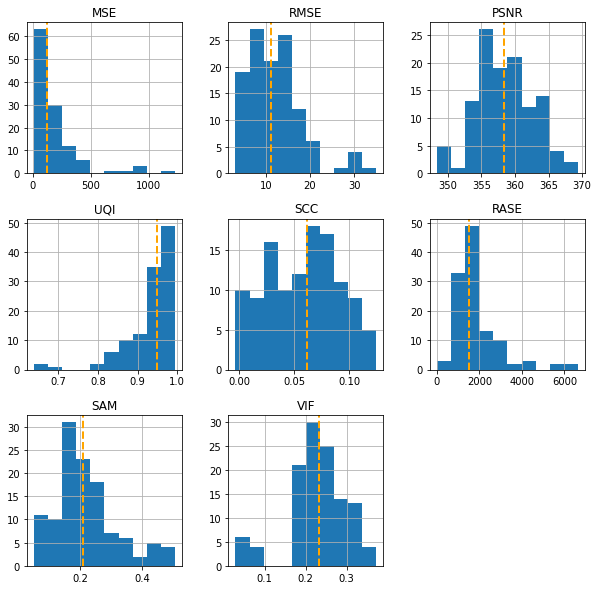

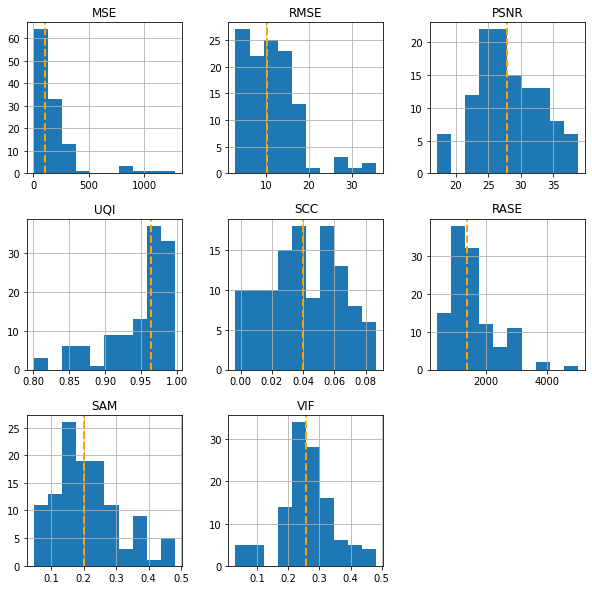

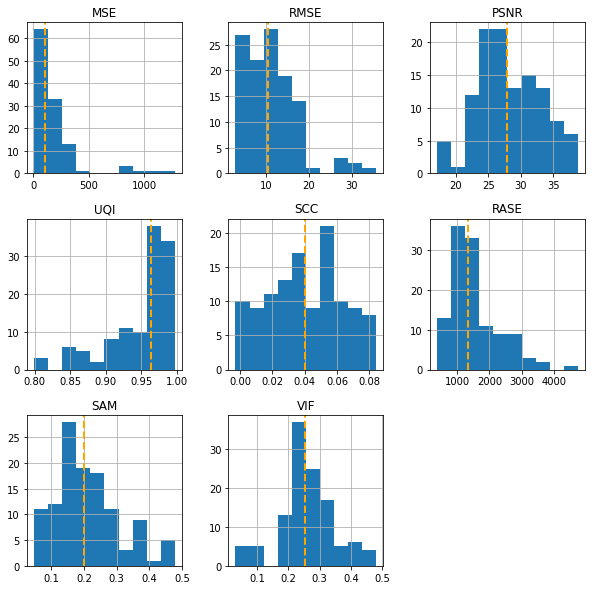

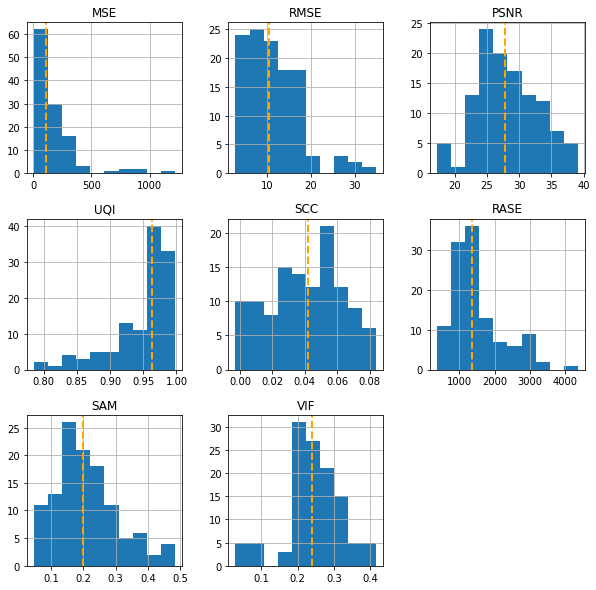

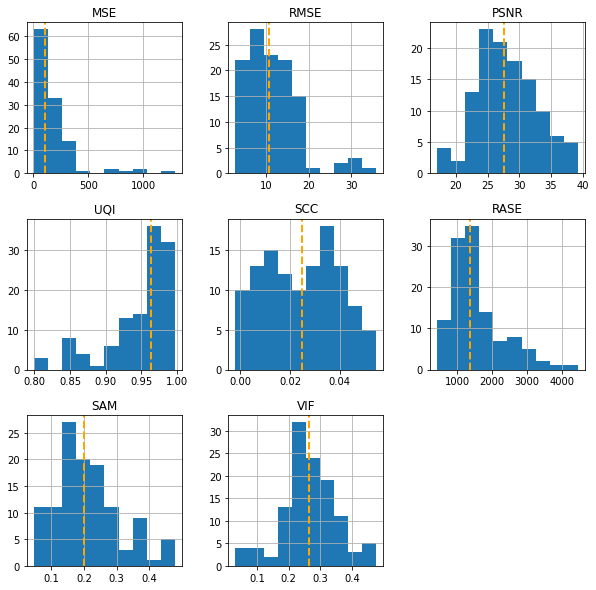

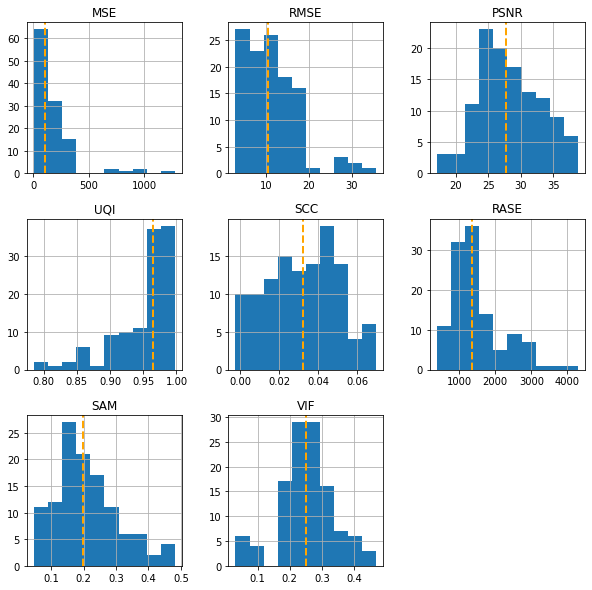

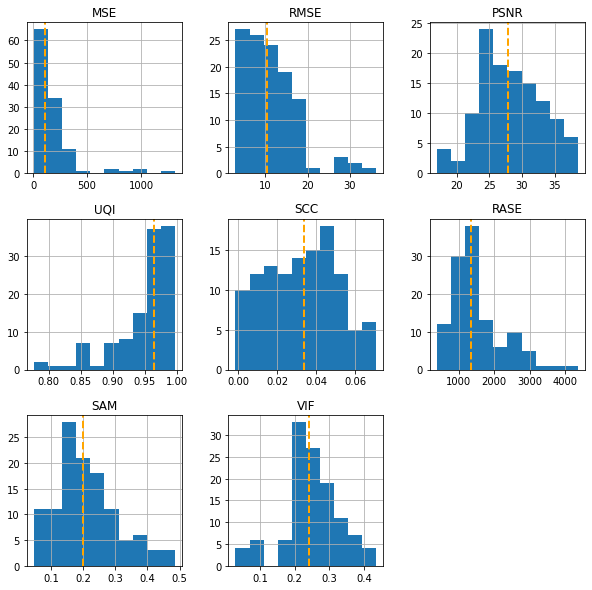

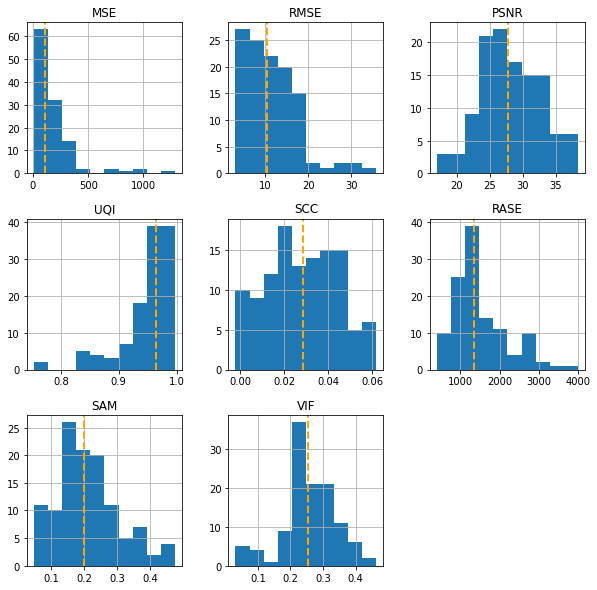

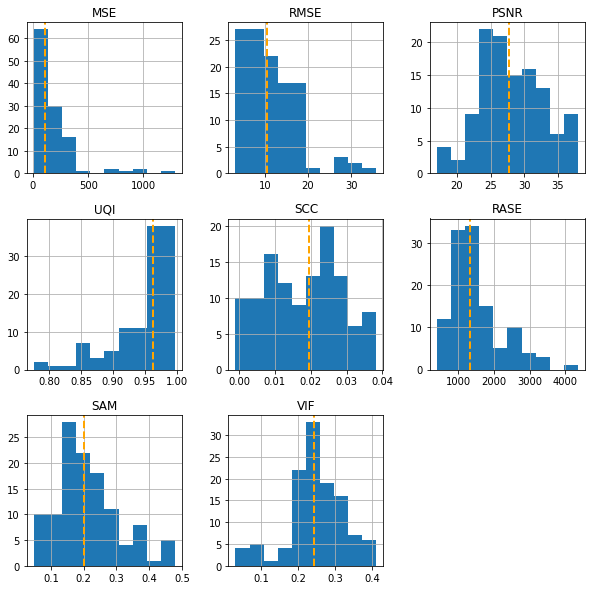

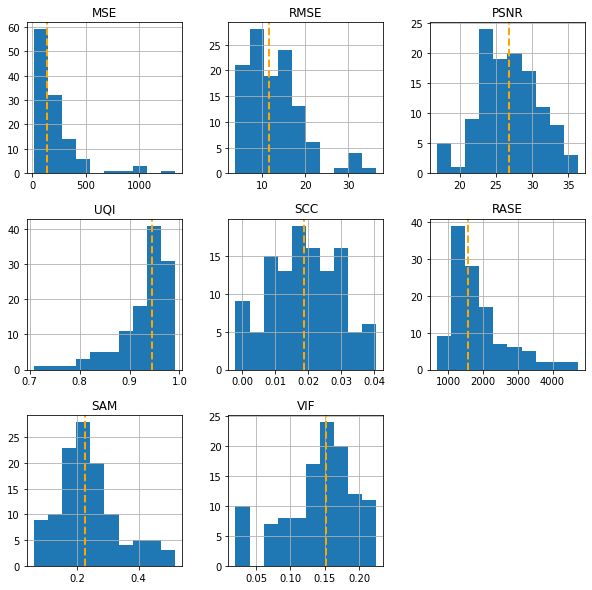

In [ ]:
# Get summary metrics and plot

metrics_files = [f for f in os.listdir(metrics_dir) if '.csv' in f]

for file_name in metrics_files:

  metrics_df = pd.read_csv(metrics_dir+file_name,index_col=0)
  metrics_df = metrics_df.fillna(0)
  metrics_df = metrics_df.replace(np.inf,0)

  (MSE, RMSE, PSNR), (UQI, SCC, RASE), (SAM, VIF, NaN) = metrics_df.hist(figsize=(10,10))

  MSE.axvline(metrics_df["MSE"].median(), color='orange', linestyle='dashed', linewidth=2)
  RMSE.axvline(metrics_df["RMSE"].median(), color='orange', linestyle='dashed', linewidth=2)
  PSNR.axvline(metrics_df["PSNR"].median(), color='orange', linestyle='dashed', linewidth=2)
  UQI.axvline(metrics_df["UQI"].median(), color='orange', linestyle='dashed', linewidth=2)
  SCC.axvline(metrics_df["SCC"].median(), color='orange', linestyle='dashed', linewidth=2)
  RASE.axvline(metrics_df["RASE"].median(), color='orange', linestyle='dashed', linewidth=2)
  SAM.axvline(metrics_df["SAM"].median(), color='orange', linestyle='dashed', linewidth=2)
  VIF.axvline(metrics_df["VIF"].median(), color='orange', linestyle='dashed', linewidth=2)
  plt.savefig(metrics_dir+'+'+file_name.split(".")[0]+"medians.png")

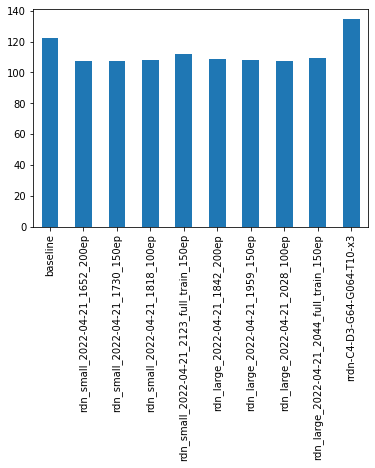

In [ ]:
joint_metrics_df.loc['MSE'].plot.bar()